In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path of the Database files
oPath = 'database/tables'
# Read all the sheets from the excel file.
students = pd.read_csv('{}/students.csv'.format(oPath), header = 0)
classes = pd.read_csv('{}/classes.csv'.format(oPath), header = 0)
tests = pd.read_csv('{}/tests.csv'.format(oPath), header = 0)
test_results = pd.read_csv('{}/test_results.csv'.format(oPath), header = 0)
attendance = pd.read_csv('{}/attendance.csv'.format(oPath), header = 0)
hw = pd.read_csv('{}/hw_assignments.csv'.format(oPath), header = 0)
hw_results = pd.read_csv('{}/hw_grades.csv'.format(oPath), header = 0)
participation = pd.read_csv('{}/participation.csv'.format(oPath), header = 0)

# Define a function to show values
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.05
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Get a list of all class IDs
lClasses = classes['CLASS_ID'].to_list()
# Get a list of student IDs
lStudents = students['STUDENT_ID'].to_list()

In [ ]:
# Set the class ID
vClass_id = 1
# Set the month and year
vYear = 2015
vMonth = 7

# Test Scores

### Create DFs for each Class

In [126]:
# Create a DataFrame of test results for each class
dfTestsResults = {}
# Loop through the class list
for i in lClasses:
    # Define a DF for the class based on its ID
    dfTestsResults[i] = test_results.where(test_results['CLASS_ID'] == i)
    # Drop the rows with all nans
    dfTestsResults[i].dropna(how = 'all', inplace = True)
    # Reset the index
    dfTestsResults[i] = dfTestsResults[i].reset_index(drop = True)
    # Set the types of columns
    dfTestsResults[i] = dfTestsResults[i].astype({'STUDENT_ID': 'int32', 'TEST_ID': 'int32', 'TEST_SCORE': 'int32', 'TEST_SCORE_MAX': 'int32', 'CLASS_ID': 'int32'})

### Filter a Class's DF by Year and Month

In [127]:
for i in lClasses:
    # Cast the TEST_DATE column to Datetime
    dfTestsResults[i]['TEST_DATE'] = pd.to_datetime(dfTestsResults[i]['TEST_DATE'])
    # Filter the DF based on year and month
    dfTestsResults[i] = dfTestsResults[i].where(  (dfTestsResults[i]['TEST_DATE'].dt.year == vYear) 
                                                            & (dfTestsResults[i]['TEST_DATE'].dt.month == vMonth)
                                                            )
    # Drop null rows
    dfTestsResults[i].dropna(how = 'all', inplace = True)
    # Reset the index
    dfTestsResults[i] = dfTestsResults[i].reset_index(drop = True)
    # Cast the specified columns to their respective types
    dfTestsResults[i] = dfTestsResults[i].astype({'TEST_ID':'int32', 'STUDENT_ID':'int32', 'CLASS_ID':'int32'})
    # Merge their name with the DF
    dfTestsResults[i] = pd.merge(dfTestsResults[i], students, on = 'STUDENT_ID')

In [113]:
# Merge their name with the DF
dfTestsResults[vClass_id] = pd.merge(dfTestsResults[vClass_id], students, on = 'STUDENT_ID')

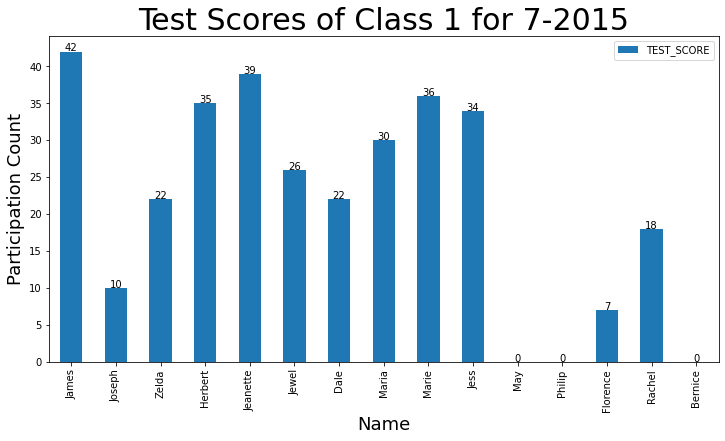

In [128]:
# Set the title
tTitle = "Test Scores of Class {} for {}-{}".format(vClass_id, vMonth, vYear)
# Plot the test scores that are returned
pTestScores = dfTestsResults[vClass_id].plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'TEST_SCORE', figsize=(12, 6))
# Format the graph
pTestScores.set_title(tTitle, size = 30)
pTestScores.set_xlabel("Name", size = 18)
pTestScores.set_ylabel("Participation Count", size = 18)
# Show values at the tops of the bars
show_values_on_bars(pTestScores)
# Save the figure
pTestScores.figure.savefig("images\{}.png".format(tTitle))

### Something

In [ ]:
i = 1

lTests = dfTests[i]['TEST_ID'].unique()
dfGroup = pd.DataFrame(dfTests[i].groupby(['CLASS_ID', 'TEST_ID'])['TEST_SCORE'].mean())
dfGroup.rename(columns = {'TEST_SCORE':'MEAN_SCORE'})
dfGroup

# Participation

## Average Attempts per Instance

### Prepare DataFrames

In [ ]:
dfPartStudent = {}
student_id = 0
dfPartStudent[student_id] = participation.where(participation['STUDENT_ID'] == student_id)
dfPartStudent[student_id].dropna(how = 'all', inplace = True)
dfPartStudent[student_id]

In [ ]:
dfPartStudent = {}
class_id = 0
dfPartStudent[class_id] = participation.where(participation['CLASS_ID'] == class_id)
dfPartStudent[class_id].dropna(how = 'all', inplace = True)
dfPartStudent[class_id] = dfPartStudent[class_id].astype({'STUDENT_ID': 'int32'})
dfPartStudent[class_id]

In [ ]:
lClass0Students = dfPartStudent[class_id]['STUDENT_ID'].unique()
lClass0Students

## Average Hints per Instance

### Prepare DataFrames

## Participations Count by Class

### Prepare DataFrames

In [ ]:
# Create new DF from students and participation
dfVOL = pd.merge(students, participation, on = 'STUDENT_ID')
value_counts = dfVOL['STUDENT_ID'].value_counts()
# Convert value_counts to a DataFrame
dfPart = pd.DataFrame(value_counts)
# Reset its index
dfPart = dfPart.reset_index()
# Rename the columns to make them more readable
dfPart.columns = ['STUDENT_ID', 'PARTICIPATIONS COUNT']
# Merge the dfPart and students DataFrames
dfPart = pd.merge(dfPart, students, how = 'outer', on = 'STUDENT_ID')

In [ ]:
# Get the mean number of participations for each class
class_mean = dfPart.groupby('CLASS_ID')['PARTICIPATIONS COUNT'].mean()
# Convert class_mean to a DataFrame
class_mean = pd.DataFrame(class_mean)
# Reset its index
class_mean = class_mean.reset_index()
# Rename the columns
class_mean.columns = ['CLASS_ID', 'MEAN # OF PARTICIPATIONS']
# Merge the class_mean and the dfPart DataFrames 
dfNoPall = pd.merge(dfPart, class_mean, how = 'outer', on = 'CLASS_ID')

In [ ]:
# Get a list of all CLASS_IDs in ascending order
dfSorted = dfNoPall.sort_values(by = 'CLASS_ID')
# Loop through all CLASS_IDs to create a DataFrame for each class
dfNoP = {}
for i in lClasses:
    dfNoP[i] = dfNoPall.where(dfNoPall['CLASS_ID'] == i)
    dfNoP[i].drop(columns = ['STUDENT_FIRST_DAY', 'STUDENT_LAST_DAY'], axis = 0, inplace = True)
    dfNoP[i] = dfNoP[i].dropna(how = 'all')
    dfNoP[i].reset_index(inplace = True, drop = True)
    dfNoP[i] = dfNoP[i].sort_values(by = 'PARTICIPATIONS COUNT', ascending = False).reset_index(drop = True)
    dfNoP[i] = dfNoP[i].astype({'STUDENT_ID': 'int32'})

### Graphs

In [ ]:
# Generate a graph of the count of participations for each student within each class
for i in lClasses:
    tTitle = "Particpation Count by Student for Class {}".format(i)
    # Plot participations count
    pBlah = dfNoP[i].plot.bar(x = "STUDENT_NAME_ENGLISH", y = 'PARTICIPATIONS COUNT', color = 'darkgreen', figsize=(20,12), legend = False)
    # Plot the average as a line on the second axis
    dfNoP[i].plot(x = "STUDENT_NAME_ENGLISH", y = 'MEAN # OF PARTICIPATIONS', ax = pBlah, color = 'lightblue', figsize=(20,12), lw = 4, legend = True)
    # Format the graph
    pBlah.set_title(tTitle, size = 30)
    pBlah.set_xlabel("Name", size = 18)
    pBlah.set_ylabel("Participation Count", size = 18)
    pBlah.legend(["Class Mean: " + str(round(dfNoP[i]['MEAN # OF PARTICIPATIONS'][0]))])
    # Label the bars
    show_values_on_bars(pBlah)
    # Save the figure
    pBlah.figure.savefig("images\{}.png".format(tTitle))

## Participations Count Average Per Day

### Prepare DataFrames

In [ ]:
dfByDate = dfVOL.groupby(['STUDENT_ID', 'PARTICIPATION_DATETIME'])['PARTICIPATION_DATETIME'].count()
dfByDate = pd.DataFrame(dfByDate)
dfByDate = dfByDate.rename(columns = {'STUDENT_ID': 'STUDENT_ID', 'PARTICIPATION_DATETIME': 'DATETIME', 'PARTICIPATION_DATETIME': 'COUNT'})

In [ ]:
# Define a dictionary to store each student's DF in
dfPC = {}
# Define a list of Means to store in the new dataframe
lMeans = []
# Loop through the STUDENT_IDs and calculate their mean number of participations
for i in lStudents:
    # Copy the DataFrame for safety resons
    dfa = dfByDate
    # Create a new DF just for the one student
    dfPC[i] = dfa.loc[i]
    # Set their ID to their ID from the list
    dfPC[i]['STUDENT_ID'] = i
    # Calculate the mean participations per class
    dfPC[i]['MEAN'] = dfPC[i]['COUNT'].mean()
    # Sort from highest to lowest count
    dfPC[i] = dfPC[i].sort_values(by = 'COUNT', ascending = False)
    # Append the mean to lMeans
    lMeans.append(dfPC[i]['MEAN'][0])

In [ ]:
# Create a new dataframe of the students and their mean participations per class
dfMeanPart = pd.DataFrame(columns = ['STUDENT_ID', 'MEAN_PARTICIPATIONS_PER_CLASS'])
# Set the student IDs to lStudents which is a list of student IDs
dfMeanPart['STUDENT_ID'] = lStudents
# Set the mean for each student to the corresponding value in lMeans
dfMeanPart['MEAN_PARTICIPATIONS_PER_CLASS'] = lMeans
# Merge the new DF with students
dfMeanPart = pd.merge(dfMeanPart, students, how = 'inner', on = 'STUDENT_ID')
# Drop unneeded columns
dfMeanPart.drop(columns = ['STUDENT_ENROLLED', 'STUDENT_FIRST_DAY', 'STUDENT_LAST_DAY'], inplace = True)

### Graphs

In [ ]:
# Plot the students' means by class
for i in lClasses:
    # Set the title
    tTitle = "Mean Particpations for Class {}".format(i)
    # Filter the DF based on the class ID
    df = dfMeanPart.where(dfMeanPart['CLASS_ID'] == i)
    # Drop rows that are entirely nan
    df.dropna(how = 'all', inplace = True)
    # Sort values from highest to lowest mean participation
    df = df.sort_values(by = 'MEAN_PARTICIPATIONS_PER_CLASS', ascending = False)
    # Create class mean column
    df['CLASS_MEAN'] = df['MEAN_PARTICIPATIONS_PER_CLASS'].mean()
    # Plot participations count
    pBlah = df.plot.bar(x = "STUDENT_NAME_ENGLISH", y = 'MEAN_PARTICIPATIONS_PER_CLASS', color = 'darkgreen', figsize=(20,12), legend = False)
    # Plot the average as a line on the second axis
    df.plot(x = "STUDENT_NAME_ENGLISH", y = 'CLASS_MEAN', ax = pBlah, color = 'lightblue', figsize=(20,12), lw = 4, legend = True)
    # Format the graph
    pBlah.set_title(tTitle, size = 30)
    pBlah.set_xlabel("Name", size = 18)
    pBlah.set_ylabel("Mean Participations per Class", size = 18)
    pBlah.legend(["Class Mean: " + str(round(df['MEAN_PARTICIPATIONS_PER_CLASS'].mean(), 2))])
    # Label the bars
    show_values_on_bars(pBlah)
    # Save the figure
    pBlah.figure.savefig("images\{}.png".format(tTitle))